In [1]:
library(extraDistr)
set.seed(2024)
K = 20

[1] 0.0000 0.0475 0.0900 0.1275 0.1600 0.1875 0.2100 0.2275 0.2400 0.2475
[11] 0.2500 0.2475 0.2400 0.2275 0.2100 0.1875 0.1600 0.1275 0.0900 0.0475
[21] 0.0000

[1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

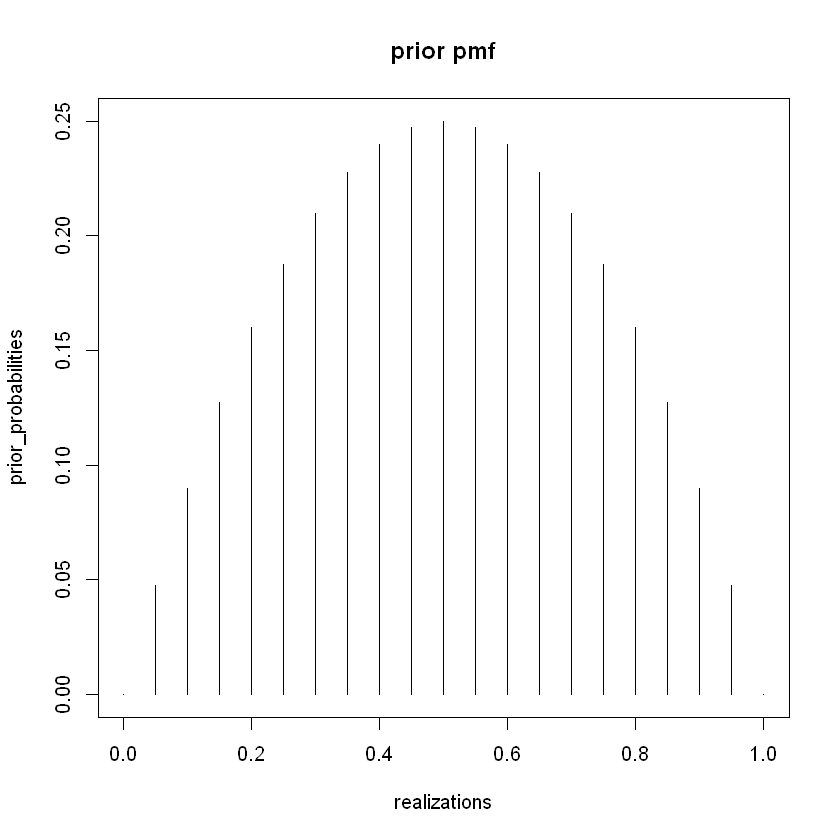

In [2]:
# Q2
prior_probabilities = NULL
realizations = NULL
for (k in (0 : K)) {
    prior_probabilities = c(prior_probabilities, (k/K)*(1-k/K))
    realizations = c(realizations, k/K)
}
prior_probabilities
realizations
plot(realizations, prior_probabilities, type="h", main = "prior pmf")

[1] 0.000000e+00 8.962180e-06 1.358478e-04 6.495222e-04 1.932057e-03
 [6] 4.422128e-03 8.558410e-03 1.472297e-02 2.318469e-02 3.404260e-02
[11] 4.716937e-02 6.215460e-02 7.824832e-02 9.430430e-02 1.087235e-01
[16] 1.193975e-01 1.236517e-01 1.181890e-01 9.903303e-02 6.147159e-02
[21] 0.000000e+00

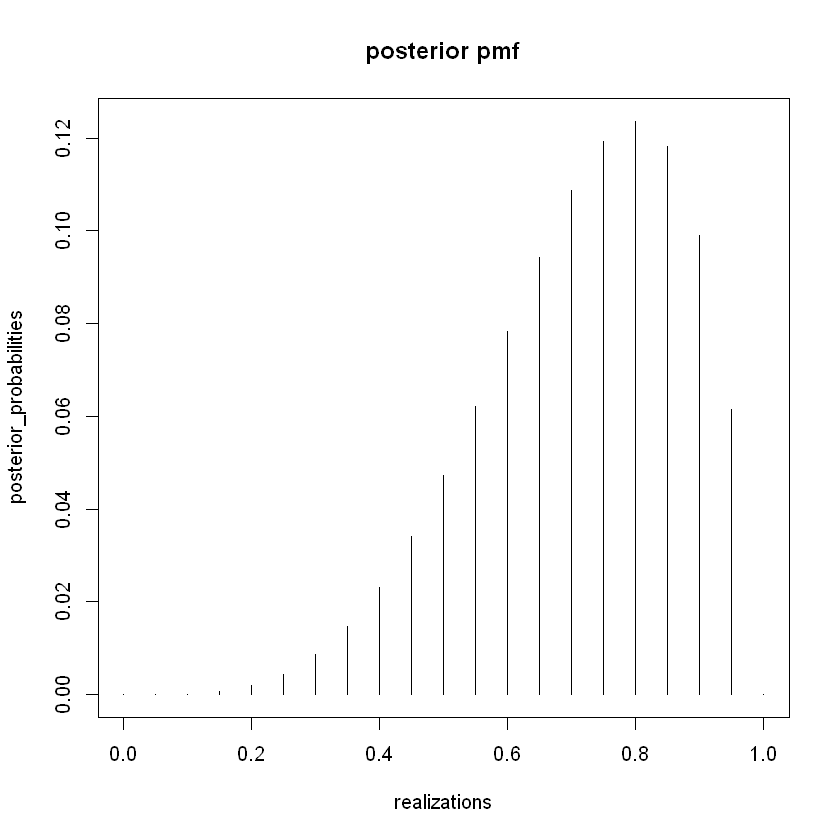

In [3]:
posterior_probabilities = NULL
Z = 0
for (k in (0 : K)) {
    # likelihood = P(X = k/K) * P(Y = (1,1,1) | X = k/K)
    likelihood = realizations[k+1]**3 * prior_probabilities[k+1]
    Z = Z + likelihood
    posterior_probabilities = c(posterior_probabilities, likelihood)
}
posterior_probabilities = posterior_probabilities / Z
posterior_probabilities
plot(realizations, posterior_probabilities, type = "h", main = "posterior pmf")

In [4]:
# posterior mean
m = 0
for (k in (0 : K)) {
    x = realizations[k+1]
    pi_k = posterior_probabilities[k+1]
    m = m + x * pi_k
}
m

[1] 0.7124978

In [6]:
loss = 2 * m - 98 * (1-m)
loss

[1] -26.75022

In [ ]:
# challenge question
# signature: posteriors, threshold -> index set
# overall complexity:
# time: O(nlogn + 2n)
# space: O(n)

highest_prob_set = function(posterior_probabilities, alpha) {
    n = length(posterior_probabilities)
    # create hashmap that maps prob -> index
    # time complexity O(n) and space complexity O(n)
    dict = c()
    for (i in (1:n)) {
        # set k-v pair as (prob, index)
        p = posterior_probabilities[i]
        dict[as.character(p)] = i
    }
    # sort complexity: O(nlogn)
    posterior_probabilities = sort(posterior_probabilities, decreasing = TRUE)

    # linear search complexity: O(n)
    j = 1
    sum = 0
    hps = NULL
    while (j <= n && sum < alpha) {
        p = posterior_probabilities[j]
        hps = c(hps, dict[as.character(p)])
        j = j + 1
        sum = sum + p
    }

    return (hps)
}

print(highest_prob_set(posterior_probabilities = posterior_probabilities, alpha=0.75))

  0.12365166366355  0.119397458514542  0.118188979349251  0.108723502608466 
                17                 16                 18                 15 
 0.099033027990302  0.094304299016047 0.0782483184120904 0.0621546023150725 
                19                 14                 13                 12 
